## Authors: David Ye and Enirere

## Task Outline:

**Material Classification for clean energy applications** <br>
New materials need to be synthezied and characterized for improving existing clean energy applications. Your task is to predict the material classes based on thier given molecular properties. Your goal in this project to think like a data scientist and to achieve highest accuracy of classification.
You have been provided with two excel files. First file contains the molecular properties of the materials. Second file lists the classes of the material. Do data preprocessing if necessary at any step, always use a random seed wherever you can and describe your methods and results in detail. All plots should have labels and legends. 
Complete the tasks below (100 points):


1.   **Data Visualization and Unsupervised Classification** : Visualize the data and implement PCA and K-means to see if you can separate different classes. Report your findings. (10)
2.   **Classification of materials**: Implement Decision tree classifier, Random Forest (RF) and KNN classifier on the dataset and estimate the accuracies, F-1 score and confusion matrix. Report which classifier performs the best. Also use the features from the pca and k-means implementation in (1) to see if that improves the classification results. (20)
3.   **Hyper-parameter tuning**: Implement hyperparameter tuning on random forest and KNN algorithms. Report the best performing model and the respective hyperparameters with highest accuracy. (20)
4. **Most important features**: Not all features contribute to the classification accuracy equally. Estimate the order of best performing features. Repeat the classification task with including different number of features in your RF classifier and report how accuracy is changing (10)
5. **XGBoost** : XGBoost is a python ML library that uses optimized gradient boosted trees and has been really successful in completing many ML tasks. Implement XGBoost on the data. Perform hyper-parameter tuning and report the highest accuracy you acheive. (20)
6. **Neural Networks**: In the era of generative AI, which is powered by neural networks, lets see how neural nets perform compared to other ML classification models. Implement a neural network to predict the class (you can use keras, tensorflow or pytorch). Play with changing the number of layers and nodes per layers to see if you can increase the classification accuracy. (20)



## 1. Data Visualization and Unsupervised Classification

### Install and Import all necessary libraries

In [124]:
try:
    import os
    import pandas as pd
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn import tree
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn import neighbors
    import numpy as np
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    import xgboost as xgb
    from xgboost import XGBClassifier
    from sklearn.preprocessing import StandardScaler
    import seaborn as sns
    import tensorflow as tf
    from keras.models import Sequential
    from keras.layers import Dense
    from sklearn.model_selection import train_test_split
    from keras.losses import CategoricalCrossentropy
except Exception as e:
    print(f"Error importing a module: {e}")
    !pip install xgboost
    !pip install tensorflow
finally:
    import os
    import pandas as pd
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn import tree
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn import neighbors
    import numpy as np
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    import xgboost as xgb
    from xgboost import XGBClassifier
    from sklearn.preprocessing import StandardScaler
    import seaborn as sns
    import tensorflow as tf
    from keras.models import Sequential
    from keras.layers import Dense
    from sklearn.model_selection import train_test_split
    from keras.losses import CategoricalCrossentropy

### Load data

In [125]:
### Load dataset into pandas dataframe
input_df = pd.read_csv("features.csv")
target_df = pd.read_csv("target.csv")

Understand the dataset

In [126]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   deltaE_Hull(eV)          339 non-null    float64
 1   Num_atoms                339 non-null    int64  
 2   Band Presence            339 non-null    int64  
 3   DeltaE(eV)               339 non-null    float64
 4   Formation Energy (eV)    339 non-null    float64
 5   Material Density(gm/cc)  339 non-null    float64
 6   Unit Volume              339 non-null    float64
 7   symmetry group           339 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 21.3 KB


In [127]:
input_df.describe()

,deltaE_Hull(eV),Num_atoms,Band Presence,DeltaE(eV),Formation Energy (eV),Material Density(gm/cc),Unit Volume,symmetry group
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.058509,38.837758,0.808260,2.090326,-2.629657,2.998854,469.960027,19.634218
std,0.030507,23.133142,0.394252,1.093679,0.184420,0.356787,294.011029,11.453875
min,0.000000,10.000000,0.000000,0.000000,-3.002624,2.202044,123.688033,0.000000
25%,0.035595,26.000000,1.000000,1.272101,-2.772323,2.775390,286.922726,14.500000
50%,0.062207,31.000000,1.000000,2.512711,-2.618834,2.959603,360.785764,20.000000
75%,0.081578,52.000000,1.000000,2.986721,-2.534092,3.123293,603.173426,29.000000
max,0.190398,132.000000,1.000000,3.848662,-2.015171,4.227671,1522.471253,43.000000


Split data into train and test set. Normalize data using standard scaler.

In [128]:
randomState = 200 # random state
testSize = 0.2 # test size
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size=testSize, random_state=randomState)
classes = y_train['Type of Material'].unique() # unique classes in target
y_train = y_train['Type of Material'] # to series
y_test = y_test['Type of Material'] # to series


scaler = StandardScaler()
scaler.fit(X_train) # fit standard scaler to train input
X_train_scaled = scaler.transform(X_train) # transform train input
X_test_scaled = scaler.transform(X_test) # transform test input

scaler = StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_scaled = pd.concat([X_train_scaled, X_test_scaled])

### Exploratory data analysis

Distribution of the types of materials:

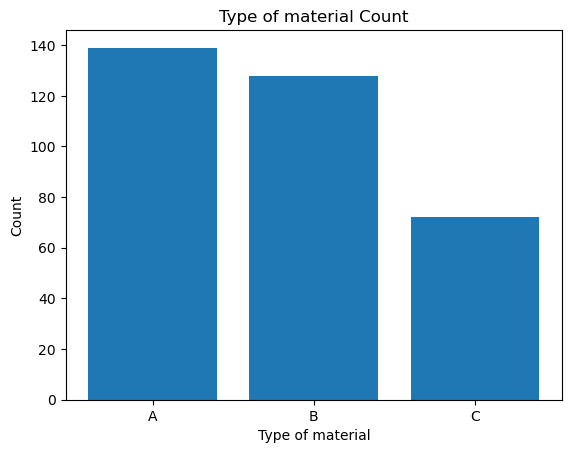

In [129]:
# Distribution
type_material = target_df['Type of Material'].value_counts()
# Plotting the bar graph
plt.bar(type_material.index, type_material)

# Adding labels and title
plt.xlabel('Type of material')
plt.ylabel('Count')
plt.title('Type of material Count')

# Display the plot
plt.show()


Boxplot of unscaled features

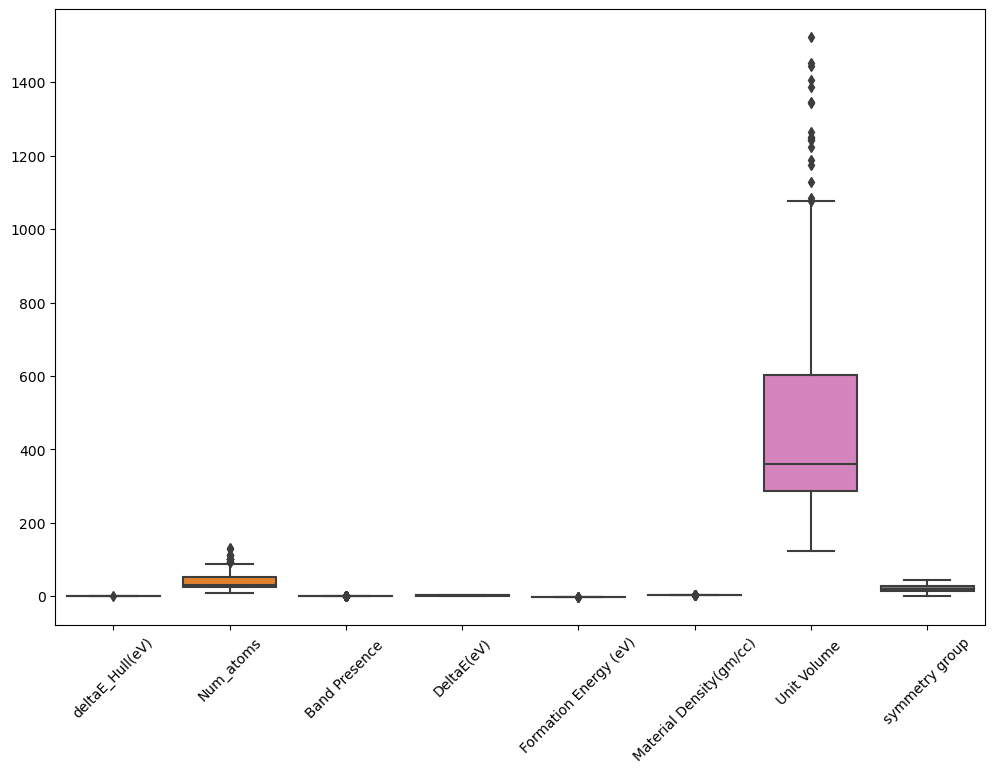

In [130]:
#boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=input_df)
plt.xticks(rotation=45)
plt.show()

Boxplot of scaled features

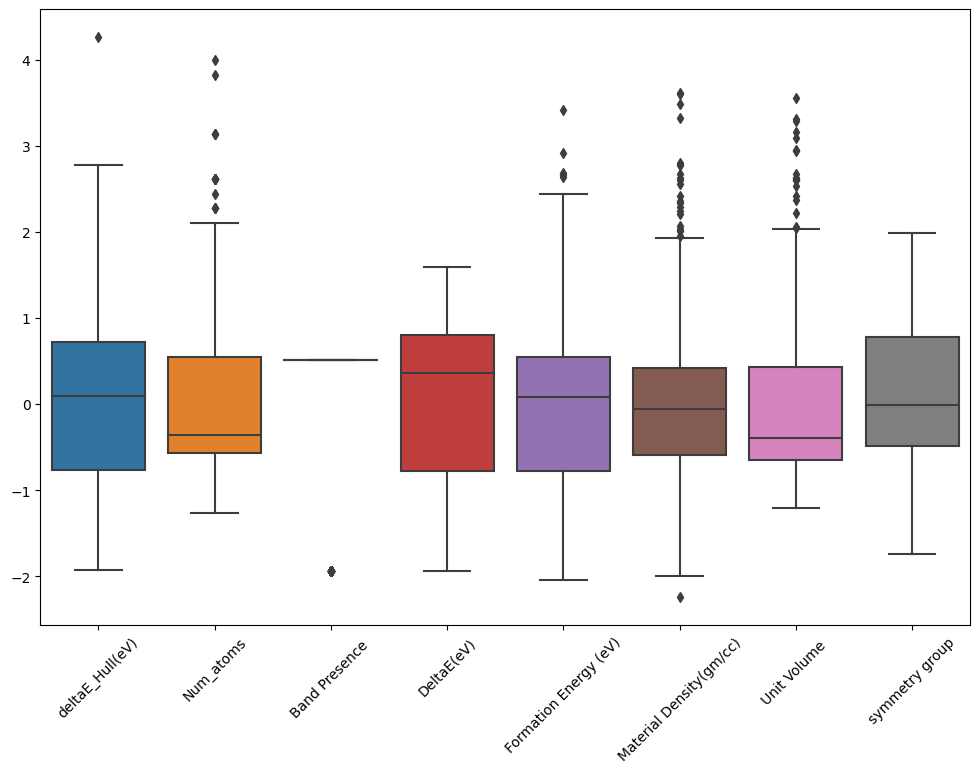

In [131]:
#boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=45)
plt.show()

From above, we can see the types of materials are not equally distribued. In particular, the number of observations classified as 'C' is almost half the numebr of observations classified as 'A' or 'B'.

Visualize the distribution of features in the dataset before and after normalization.

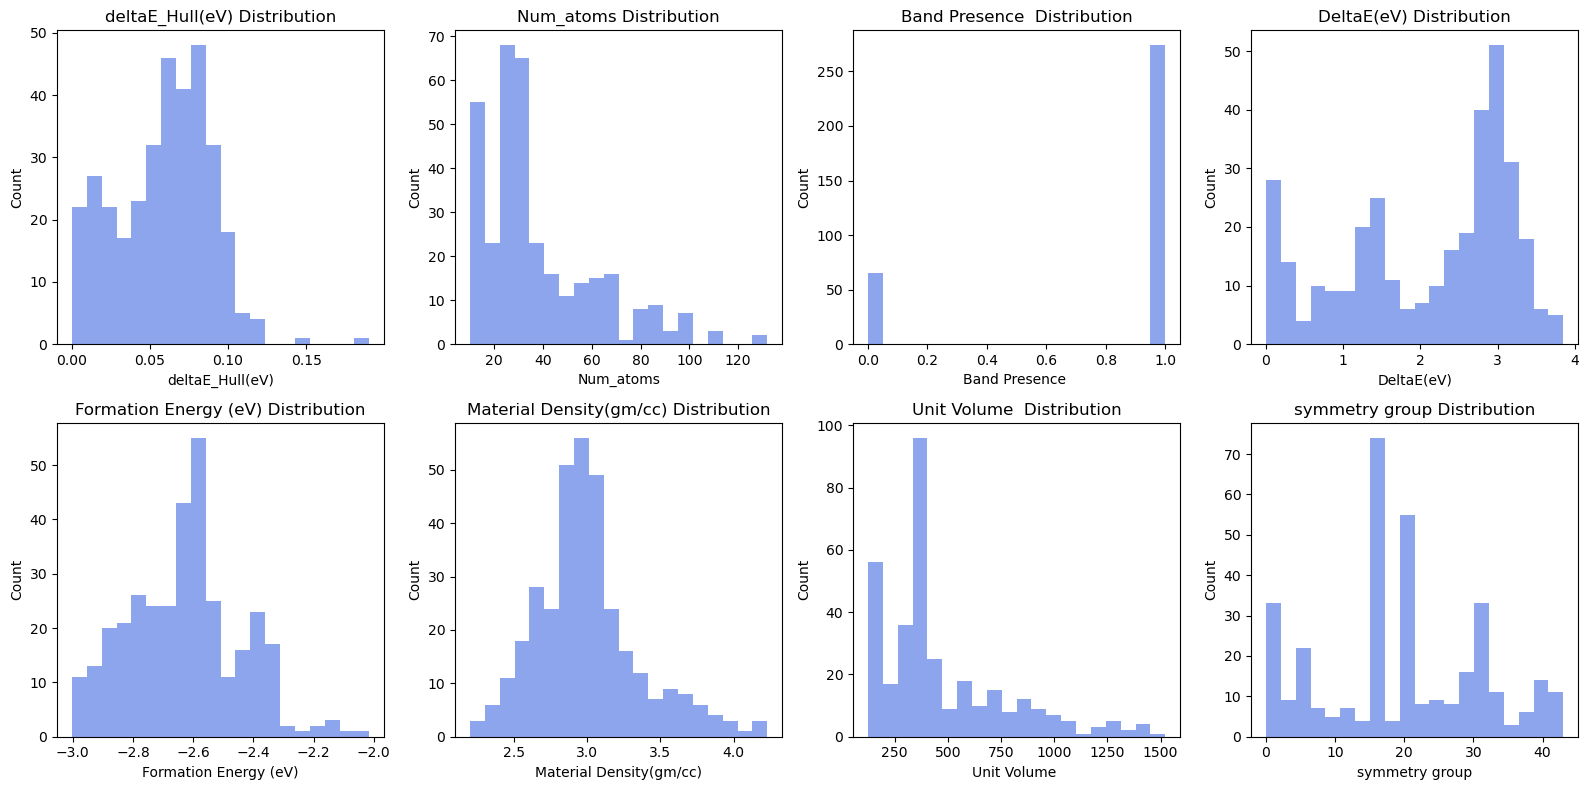

In [132]:
# Create subplots for histogram for original dataset
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.ravel()

# Plot histograms for each column
for i, col in enumerate(input_df.columns):
    axes[i].hist(input_df[col], alpha=0.6, color='royalblue', bins=20)  # You can adjust the number of bins
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{col} Distribution', fontsize=12)
plt.tight_layout()
plt.show()

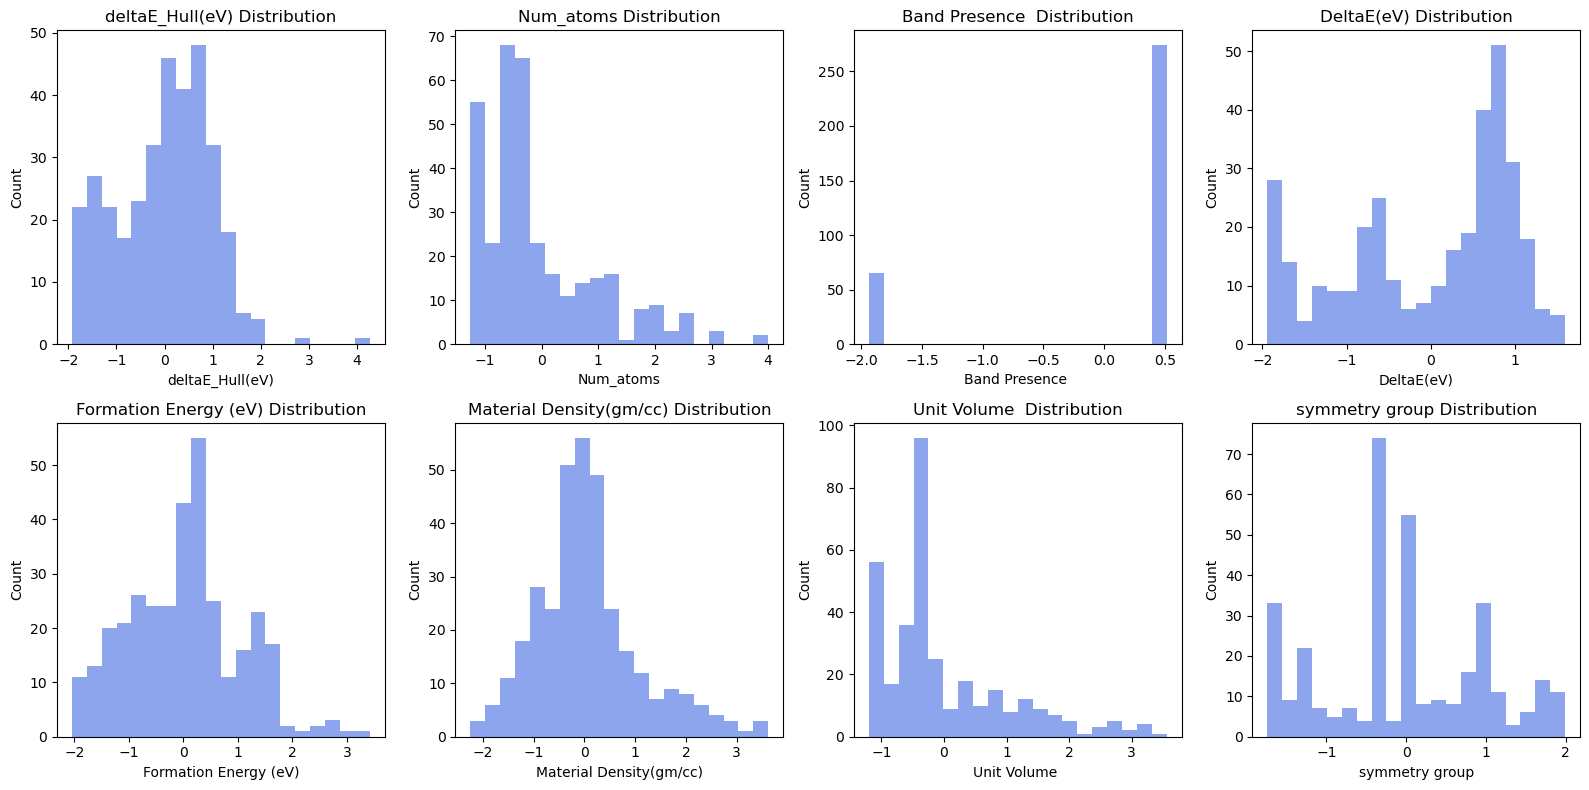

In [133]:
# Create subplots for histogram for scaled dataset
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.ravel()

# Plot histograms for each column using scaled data
for i, col in enumerate(X_scaled.columns):
    axes[i].hist(X_scaled[col], alpha=0.6, color='royalblue', bins=20)  # You can adjust the number of bins
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{col} Distribution', fontsize=12)
plt.tight_layout()
plt.show()

### Principal Component Analysis

Explore first two principal components

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_pca = pca.transform(X_scaled)

In [135]:
# Define a mapping dictionary
label_mapping = {'A': 0, 'B': 1, 'C': 2}

# Use the map function to replace string labels with numerical labels
y_encoded_train = list(map(lambda x: label_mapping[x], y_train))
y_encoded_test = list(map(lambda x: label_mapping[x], y_test))
y_encoded = y_encoded_train + y_encoded_test


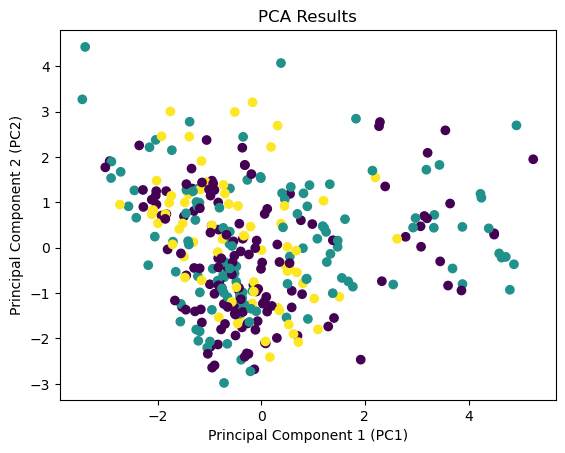

In [136]:
#Visualization
plt.scatter(X_pca[:,0],X_pca[:,1],c =y_encoded)
plt.title('PCA Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

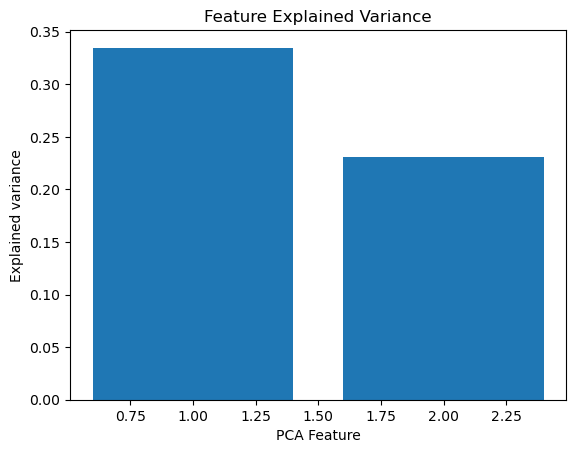

In [137]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

The first principal component explains about 33% of the variance and the second principal component explains aboutn 23% of the variance found in the dataset. Together, they account for about 56% of the variance in the dataset.

Explore all principal components and keep the minimum number of principal components needed to explain 95% of the variance in the dataset.

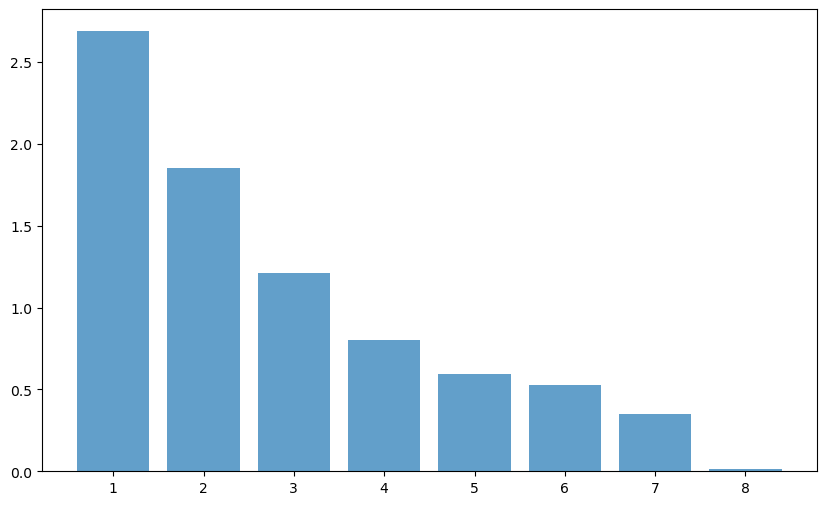

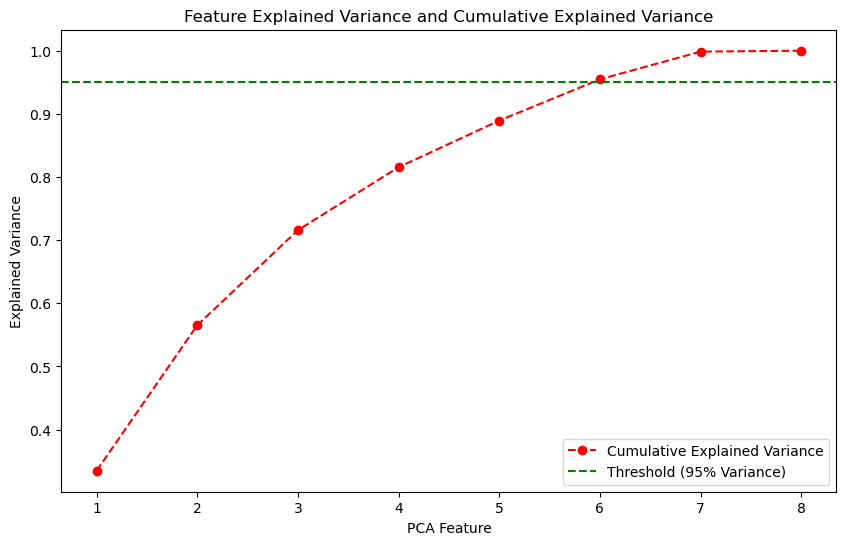

In [138]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_pca = pca.transform(X_scaled)

# Bar plot of explained_variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, alpha=0.7)


plt.figure(figsize=(10, 6))
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance as a line plot
plt.plot(range(1, len(pca.explained_variance_) + 1), cumulative_explained_variance, color='red', marker='o', linestyle='--', label='Cumulative Explained Variance')

# Draw a horizontal line at a threshold (e.g., 0.95)
plt.axhline(y=0.95, color='green', linestyle='--', label='Threshold (95% Variance)')

# Annotate the plot
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance')
plt.title('Feature Explained Variance and Cumulative Explained Variance')
plt.legend()
plt.show()

We will keep the first 6 principal components because it is the minimum number of principal components we need to explain over 95% of the variance in our dataset.

In [139]:
# Get first four principal components as input to machine learning models
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_pca = pca.transform(X_scaled)

X_train_pca = X_train_pca[:,0:6]
X_test_pca = X_test_pca[:,0:6]

### KMeans

Fit KMeans with three clusters to dataset:

d:\WinApps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


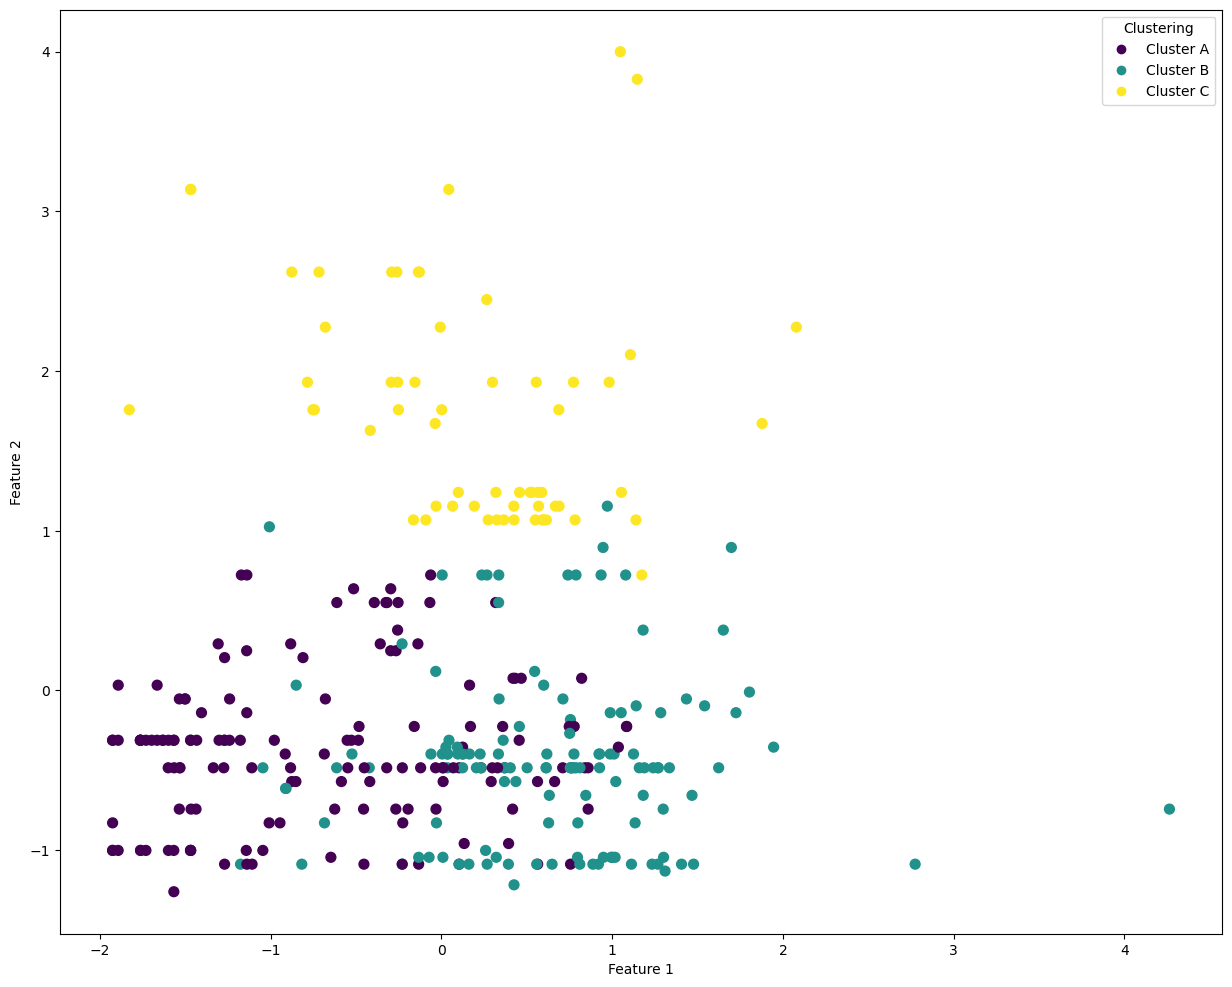

In [140]:
from sklearn.cluster import KMeans
kmeans = KMeans(
                init="random",
                n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=42
                )
kmeans.fit(X_train_scaled)

y_pred = kmeans.predict(X_scaled)
# Marker size
marker_size = 50

# Visualize the clusters
plt.figure(figsize=(15, 12))
scatter = plt.scatter(
    X_scaled.iloc[:, 0],
    X_scaled.iloc[:, 1],
    c=y_pred,
    s=marker_size,
    cmap='viridis'
)
# Add legend
legend_labels = ['Cluster A', 'Cluster B', 'Cluster C']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clustering")

# Set labels for the axes
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()

In [141]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,
                    init="random",
                    n_init=10,
                    max_iter=300,
                    random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

d:\WinApps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\WinApps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\WinApps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\WinApps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

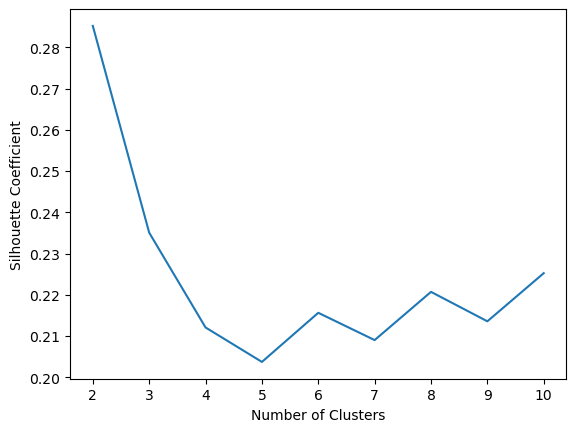

In [142]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [143]:
# Add clusters predicted by k-means to input dataset
import copy
kmeans = KMeans(n_clusters=2, random_state=randomState)
kmeans.fit(X_train_scaled)
X_train_cluster = copy.deepcopy(X_train_scaled)
X_train_cluster['cluster'] = kmeans.predict(X_train_scaled)
X_test_cluster = copy.deepcopy(X_test_scaled)
X_test_cluster['cluster'] = kmeans.predict(X_test_scaled)

d:\WinApps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\WinApps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## 2. Classification of Materials + 3. Hyper-parameter Tuning

### Implement decision tree classifier (using original features)

In [144]:
dtc = DecisionTreeClassifier(random_state=randomState)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [1, 2, 3, 4, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', refit = True)
grid_search.fit(X_train, y_train)

best_model_dtc = grid_search.best_estimator_
best_parameters_dtc = grid_search.best_params_
best_f1_dtc = f1_score(y_test, best_model_dtc.predict(X_test), average='weighted')

# print('The best model was:', best_model_ada)
print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_dtc)
print('f1-weighted score:', best_f1_dtc)
print("Accuracy on training set: {:.3f}".format(best_model_dtc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model_dtc.score(X_test, y_test)))

y_test_predictions = best_model_dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'max_depth': 4}
f1-weighted score: 0.9410014005602241
Accuracy on training set: 0.956
Accuracy on test set: 0.941


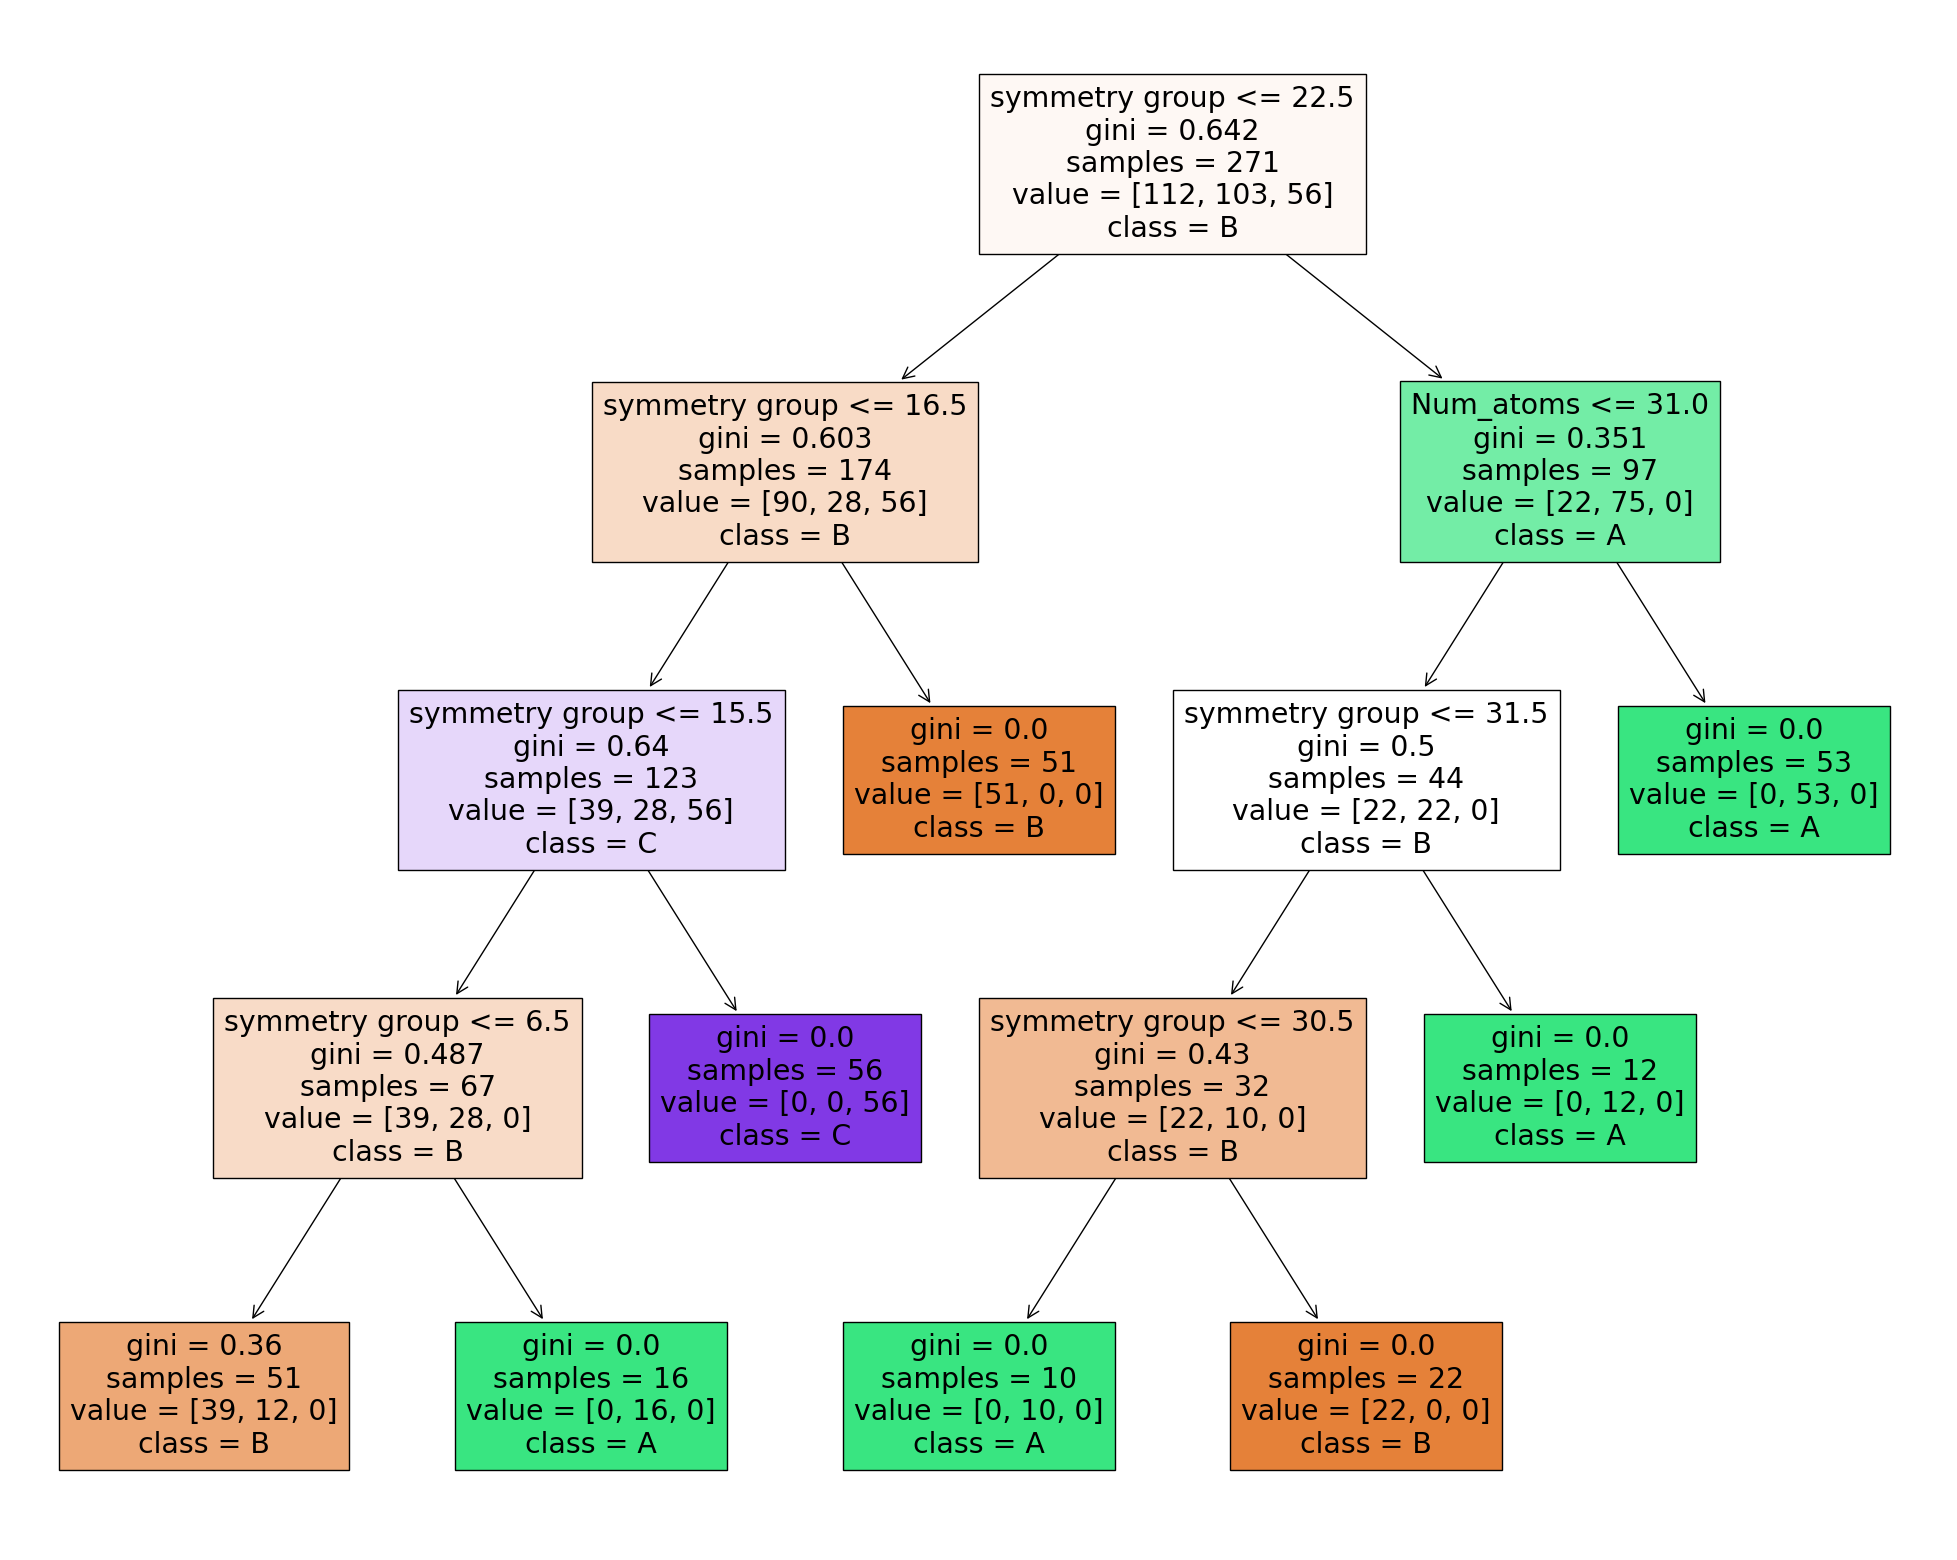

In [145]:
## Visualize tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model_dtc,
                   feature_names=X_train.columns.tolist(),
                   class_names=classes,
                   filled=True)

### Implement decision tree classifier (using original (scaled) + k-means cluster features)

In [146]:
dtc = DecisionTreeClassifier(random_state=randomState)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [1, 2, 3, 4, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', refit = True)
grid_search.fit(X_train_cluster, y_train)

best_model_dtc_kmeans = grid_search.best_estimator_
best_parameters_dtc_kmeans = grid_search.best_params_
best_f1_dtc_kmeans = f1_score(y_test, best_model_dtc_kmeans.predict(X_test_cluster), average='weighted')

# print('The best model was:', best_model_ada)
print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_dtc_kmeans)
print('f1-weighted score:', best_f1_dtc_kmeans)
print("Accuracy on training set: {:.3f}".format(best_model_dtc_kmeans.score(X_train_cluster, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model_dtc_kmeans.score(X_test_cluster, y_test)))

y_test_predictions = best_model_dtc_kmeans.predict(X_test_cluster)
cm_dtc_kmeans = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'max_depth': 4}
f1-weighted score: 0.9410014005602241
Accuracy on training set: 0.956
Accuracy on test set: 0.941


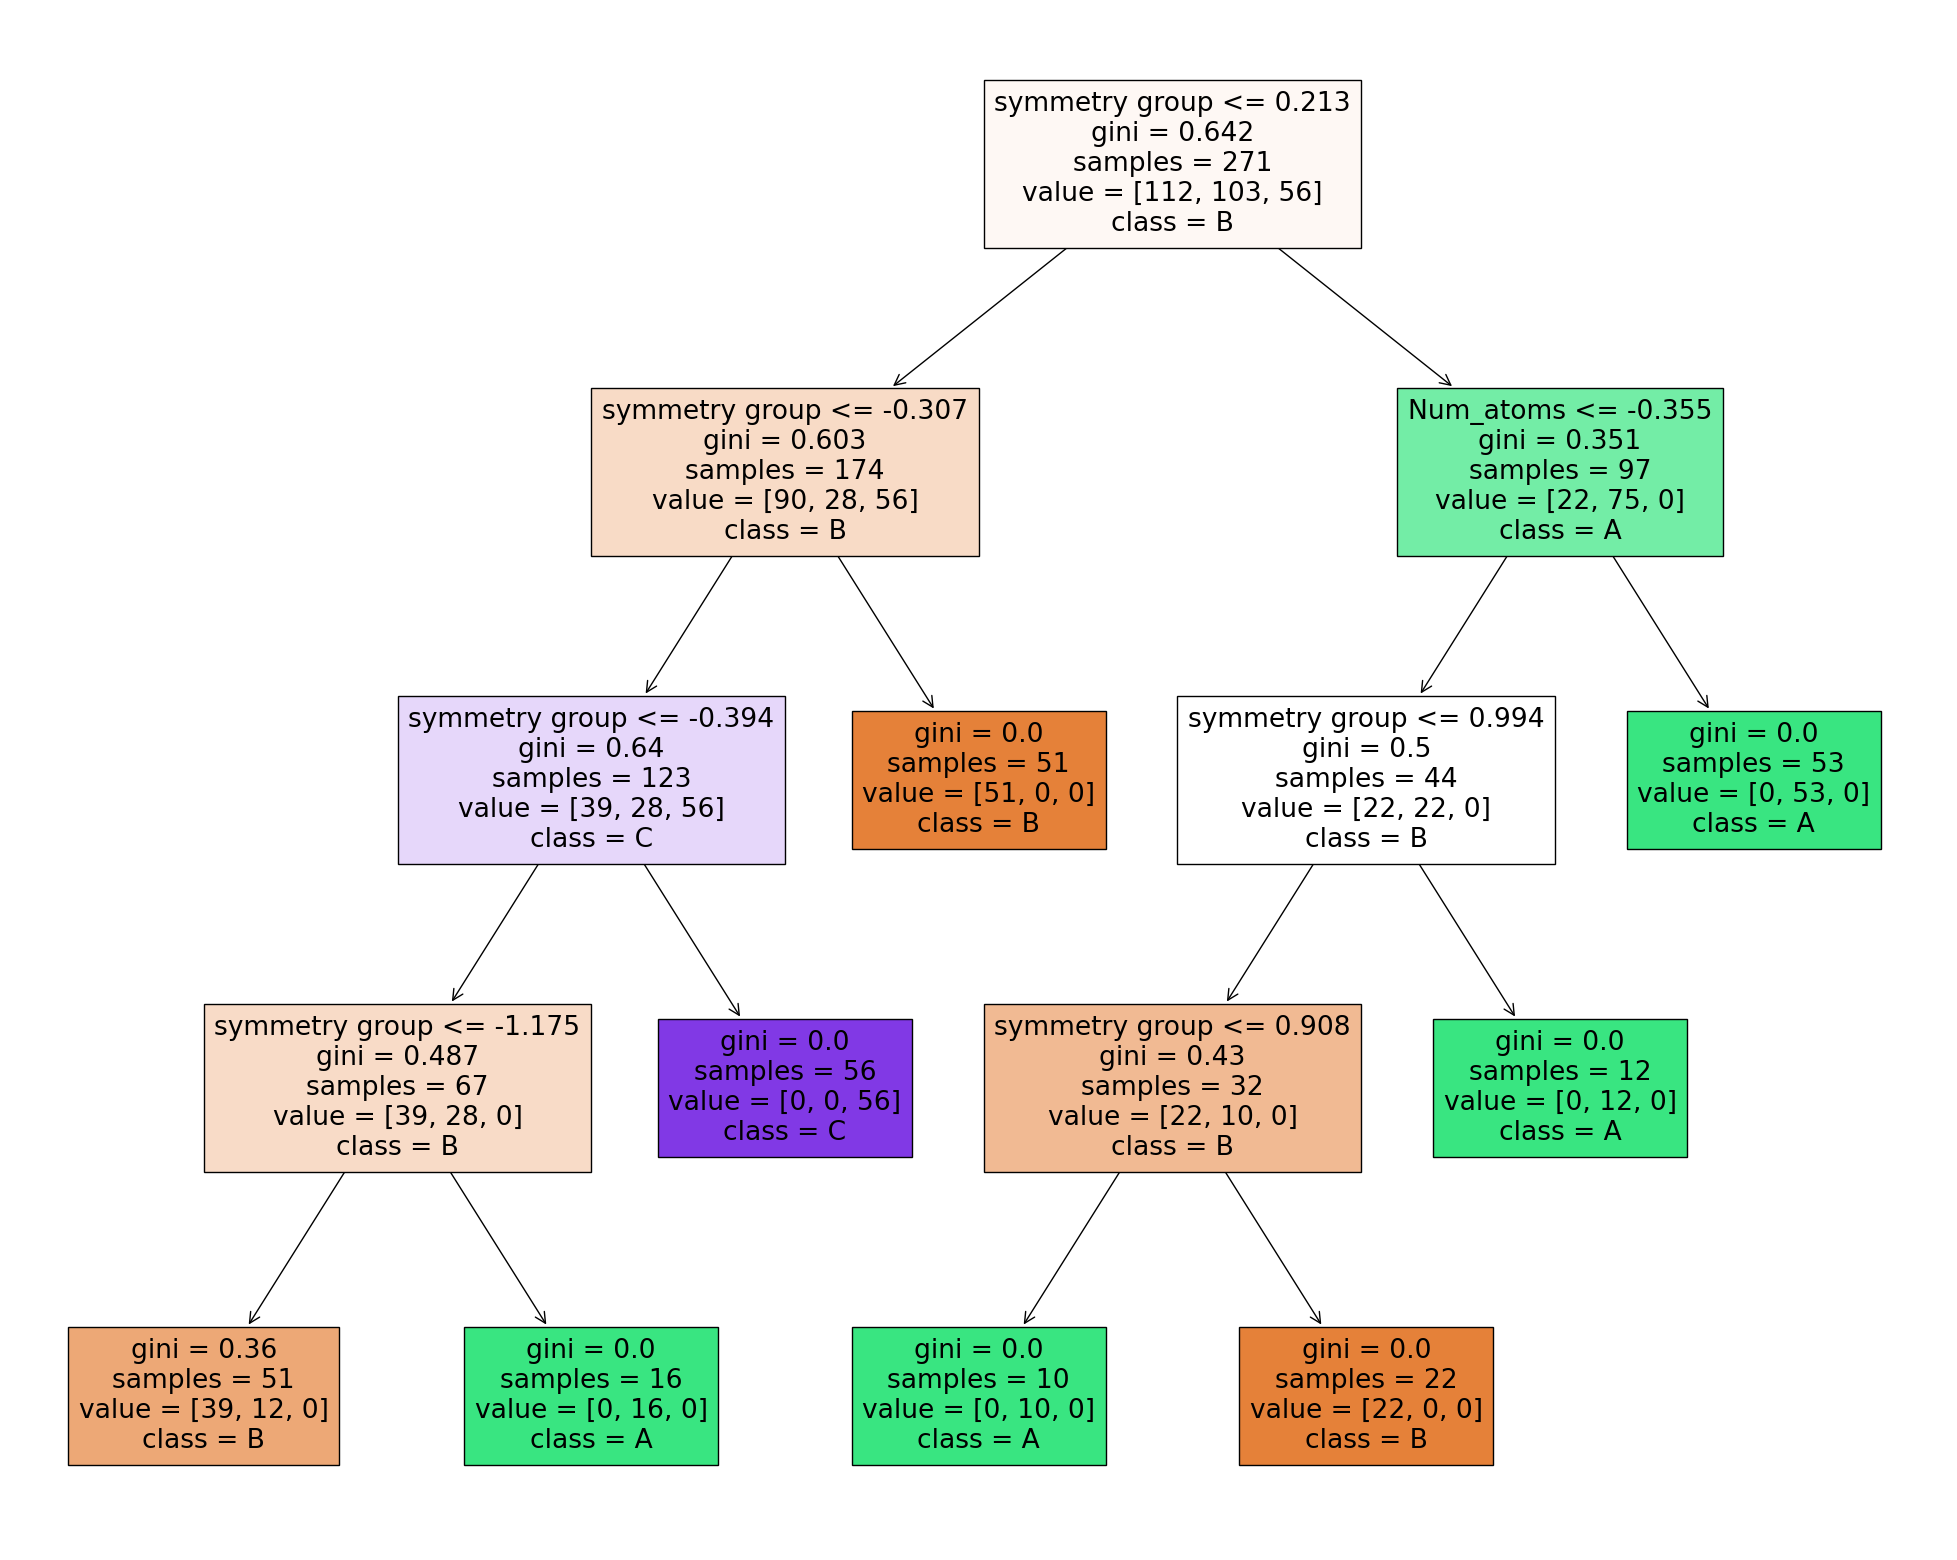

In [147]:
## Visualize tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model_dtc_kmeans,
                   feature_names=X_train.columns.tolist(),
                   class_names=classes,
                   filled=True)

### Implement decision tree classifier (using four principal components)

In [148]:
dtc = DecisionTreeClassifier(random_state=randomState)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [1, 2, 3, 4, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', refit = True)
grid_search.fit(X_train_pca, y_train)

best_model_dtc_pca = grid_search.best_estimator_
best_parameters_dtc_pca = grid_search.best_params_
best_f1_dtc_pca = f1_score(y_test, best_model_dtc_pca.predict(X_test_pca), average='weighted')

# print('The best model was:', best_model_ada)
print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_dtc_pca)
print('f1-weighted score:', best_f1_dtc_pca)
print("Accuracy on training set: {:.3f}".format(best_model_dtc_pca.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model_dtc_pca.score(X_test_pca, y_test)))

y_test_predictions = best_model_dtc_pca.predict(X_test_pca)
cm_dtc_pca = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'max_depth': 1}
f1-weighted score: 0.42847284020122406
Accuracy on training set: 0.568
Accuracy on test set: 0.500


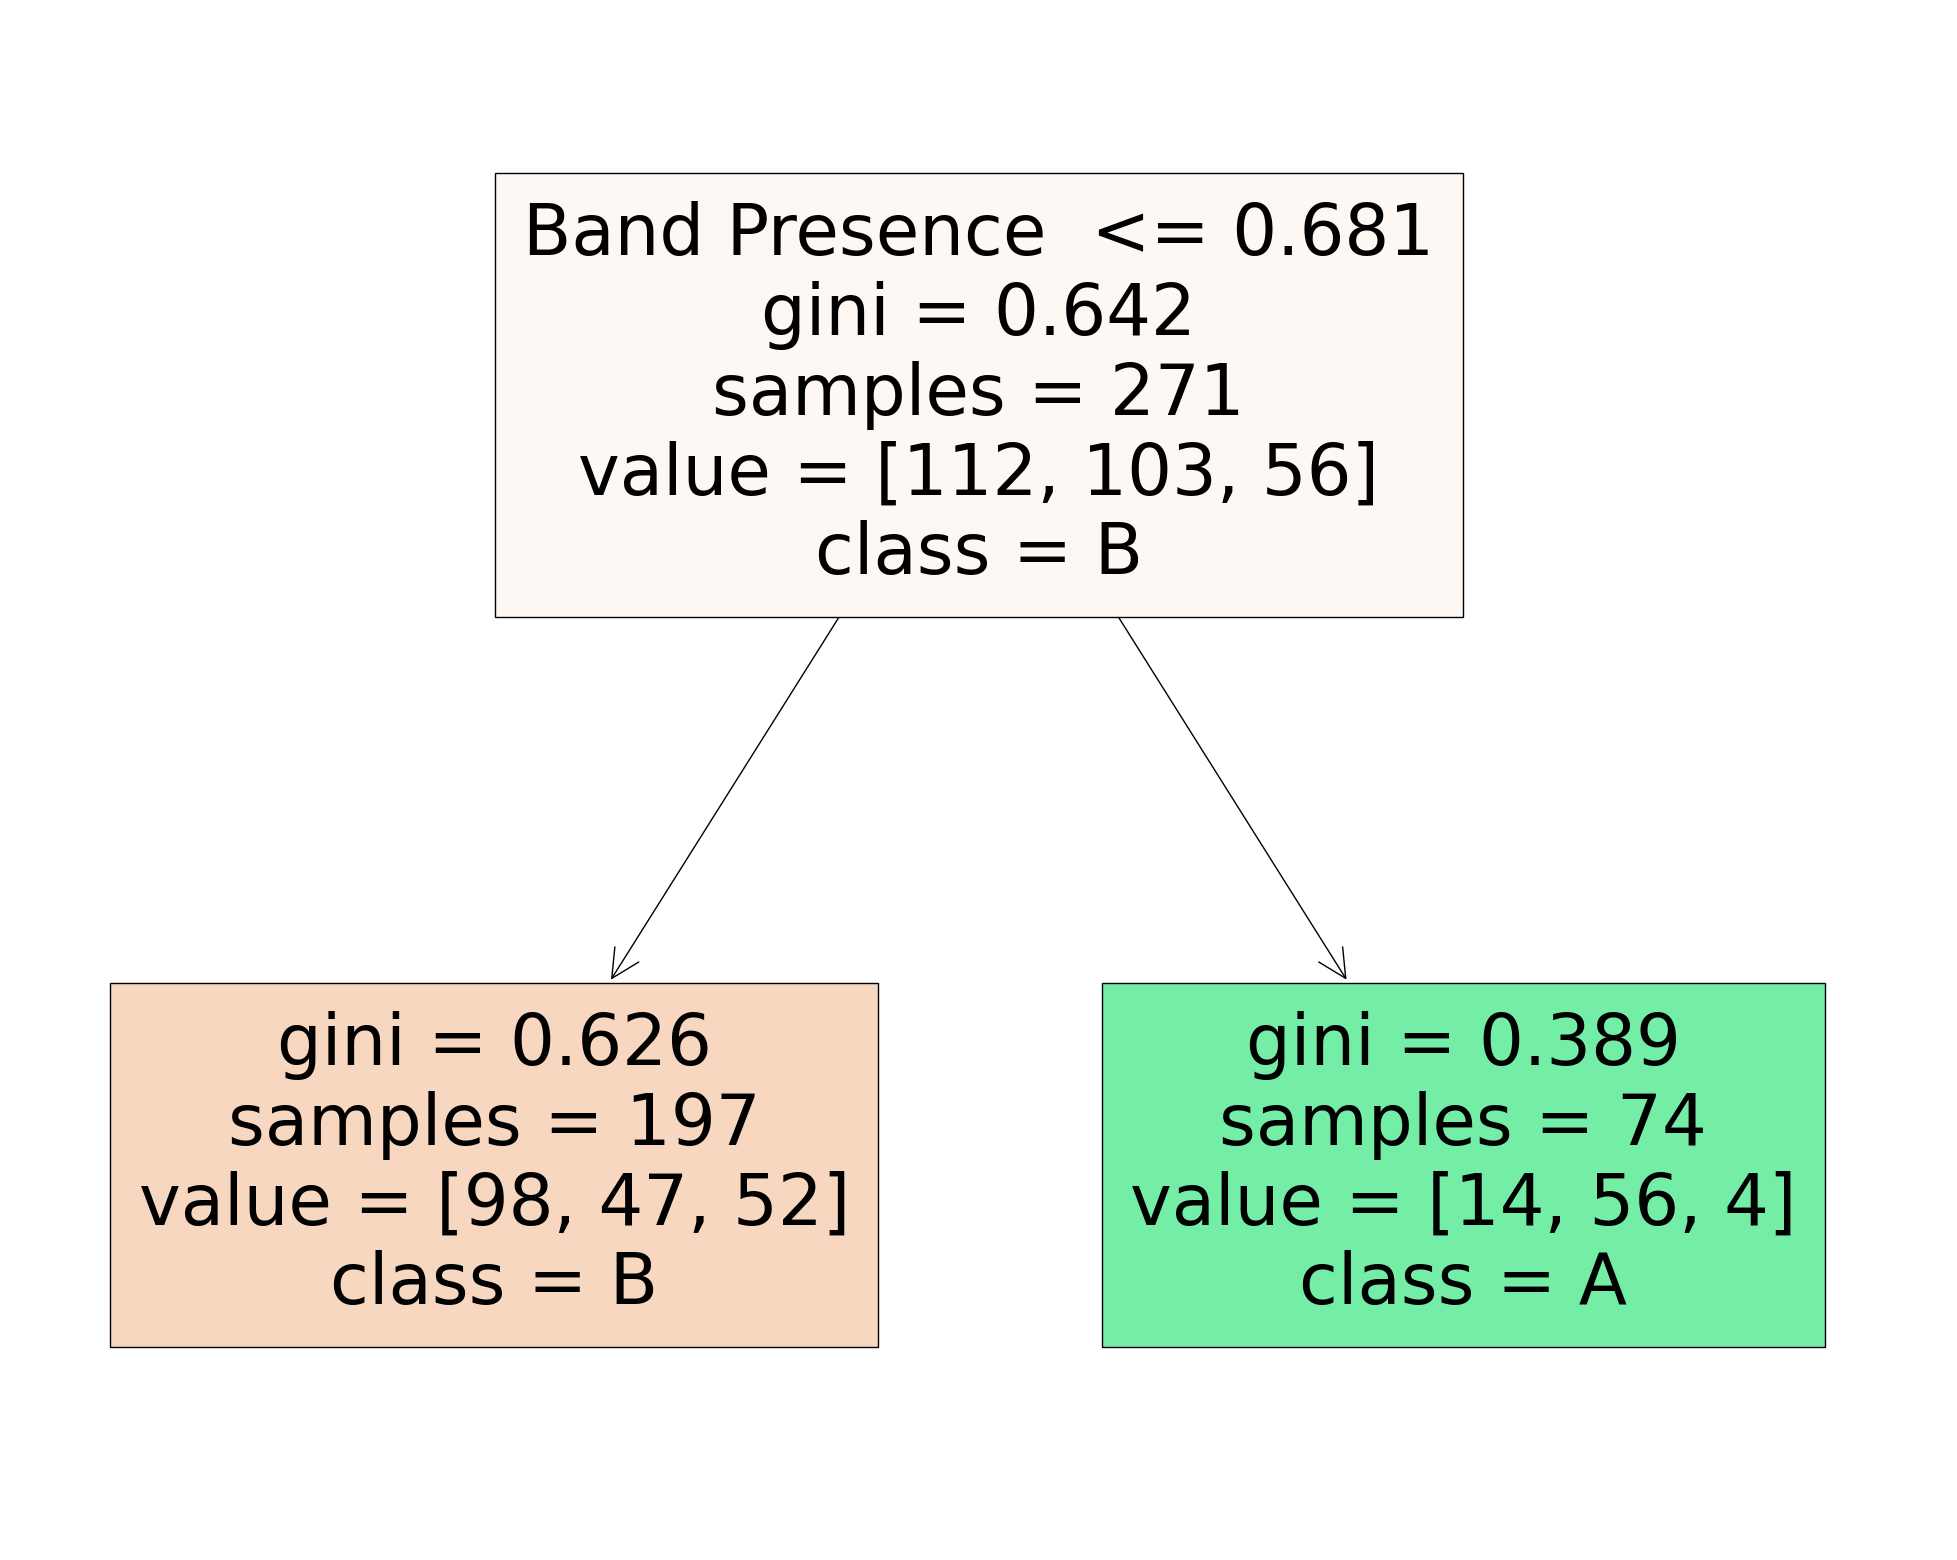

In [149]:
## Visualize tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model_dtc_pca,
                   feature_names=X_train.columns.tolist(),
                   class_names=classes,
                   filled=True)

### Implement random forest classifier (using original features)

In [150]:
# Create Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=randomState)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', refit = True)
grid_search.fit(X_train, y_train)

best_model_rf = grid_search.best_estimator_
best_parameters_rf = grid_search.best_params_
best_f1_rf = f1_score(y_test, best_model_rf.predict(X_test), average='weighted')

print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_rf)
print('f1-weighted score:', best_f1_rf)
print("Accuracy on training set: {:.3f}".format(best_model_rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model_rf.score(X_test, y_test)))

y_test_predictions = best_model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
f1-weighted score: 0.8980382288221248
Accuracy on training set: 1.000
Accuracy on test set: 0.897


### Implement random forest classifier (using original (scaled) + k-means cluster features)

In [151]:
# Create Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=randomState)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', refit = True)
grid_search.fit(X_train_cluster, y_train)

best_model_rf_kmeans = grid_search.best_estimator_
best_parameters_rf_kmeans = grid_search.best_params_
best_f1_rf_kmeans = f1_score(y_test, best_model_rf_kmeans.predict(X_test_cluster), average='weighted')

print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_rf_kmeans)
print('f1-weighted score:', best_f1_rf_kmeans)
print("Accuracy on training set: {:.3f}".format(best_model_rf_kmeans.score(X_train_cluster, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model_rf_kmeans.score(X_test_cluster, y_test)))

y_test_predictions = best_model_rf_kmeans.predict(X_test_cluster)
cm_rf_kmeans = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
f1-weighted score: 0.9126328583299228
Accuracy on training set: 1.000
Accuracy on test set: 0.912


### Implement random forest classifier (using four principal components)

In [152]:
# Create Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=randomState)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', refit = True)
grid_search.fit(X_train_pca, y_train)

best_model_rf_pca = grid_search.best_estimator_
best_parameters_rf_pca = grid_search.best_params_
best_f1_rf_pca = f1_score(y_test, best_model_rf_pca.predict(X_test_pca), average='weighted')

print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_rf_pca)
print('f1-weighted score:', best_f1_rf_pca)
print("Accuracy on training set: {:.3f}".format(best_model_rf_pca.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model_rf_pca.score(X_test_pca, y_test)))

y_test_predictions = best_model_rf_pca.predict(X_test_pca)
cm_rf_pca = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
f1-weighted score: 0.5570409982174688
Accuracy on training set: 0.996
Accuracy on test set: 0.559


### Implement k-nearest neighbors classifier (using original features)

In [153]:
knn_model = neighbors.KNeighborsClassifier(weights='uniform')

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': np.arange(1, 21)
}

# Create GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', refit = True)
grid_search.fit(X_train, y_train)

best_model_KNN = grid_search.best_estimator_
best_parameters_KNN = grid_search.best_params_
best_f1_KNN = f1_score(y_test, best_model_KNN.predict(X_test), average='weighted')
print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_KNN)
print('f1-weighted score:', best_f1_KNN)
print("Accuracy on training set: {:.5f}".format(best_model_KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(best_model_KNN.score(X_test, y_test)))

y_test_predictions = best_model_KNN.predict(X_test)
cm_knn = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'n_neighbors': 1}
f1-weighted score: 0.7634050524234461
Accuracy on training set: 1.00000
Accuracy on test set: 0.76471


### Implement k-nearest neighbors classifier (using original (scaled) + k-means cluster features)

In [154]:
knn_model = neighbors.KNeighborsClassifier(weights='uniform')

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': np.arange(1, 21)
}

# Create GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', refit = True)
grid_search.fit(X_train_cluster, y_train)

best_model_KNN_kmeans = grid_search.best_estimator_
best_parameters_KNN_kmeans = grid_search.best_params_
best_f1_KNN_kmeans = f1_score(y_test, best_model_KNN_kmeans.predict(X_test_cluster), average='weighted')
print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_KNN_kmeans)
print('f1-weighted score:', best_f1_KNN_kmeans)
print("Accuracy on training set: {:.5f}".format(best_model_KNN_kmeans.score(X_train_cluster, y_train)))
print("Accuracy on test set: {:.5f}".format(best_model_KNN_kmeans.score(X_test_cluster, y_test)))

y_test_predictions = best_model_KNN_kmeans.predict(X_test_cluster)
cm_knn_kmeans = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'n_neighbors': 1}
f1-weighted score: 0.6574176298085215
Accuracy on training set: 1.00000
Accuracy on test set: 0.66176


### Implement k-nearest neighbors classifier (using four principal components)

In [155]:
knn_model = neighbors.KNeighborsClassifier(weights='uniform')

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': np.arange(1, 21)
}

# Create GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', refit = True)
grid_search.fit(X_train_pca, y_train)

best_model_KNN_pca = grid_search.best_estimator_
best_parameters_KNN_pca = grid_search.best_params_
best_f1_KNN_pca = f1_score(y_test, best_model_KNN_pca.predict(X_test_pca), average='weighted')
print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_KNN_pca)
print('f1-weighted score:', best_f1_KNN_pca)
print("Accuracy on training set: {:.5f}".format(best_model_KNN_pca.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.5f}".format(best_model_KNN_pca.score(X_test_pca, y_test)))

y_test_predictions = best_model_KNN_pca.predict(X_test_pca)
cm_knn_pca = confusion_matrix(y_test,y_test_predictions)

Results for highest accuracy model:
Model parameters: {'n_neighbors': 1}
f1-weighted score: 0.6593163468595994
Accuracy on training set: 1.00000
Accuracy on test set: 0.66176


### Visualize confusion matrices of the nine classifiers

<function matplotlib.pyplot.show(close=None, block=None)>

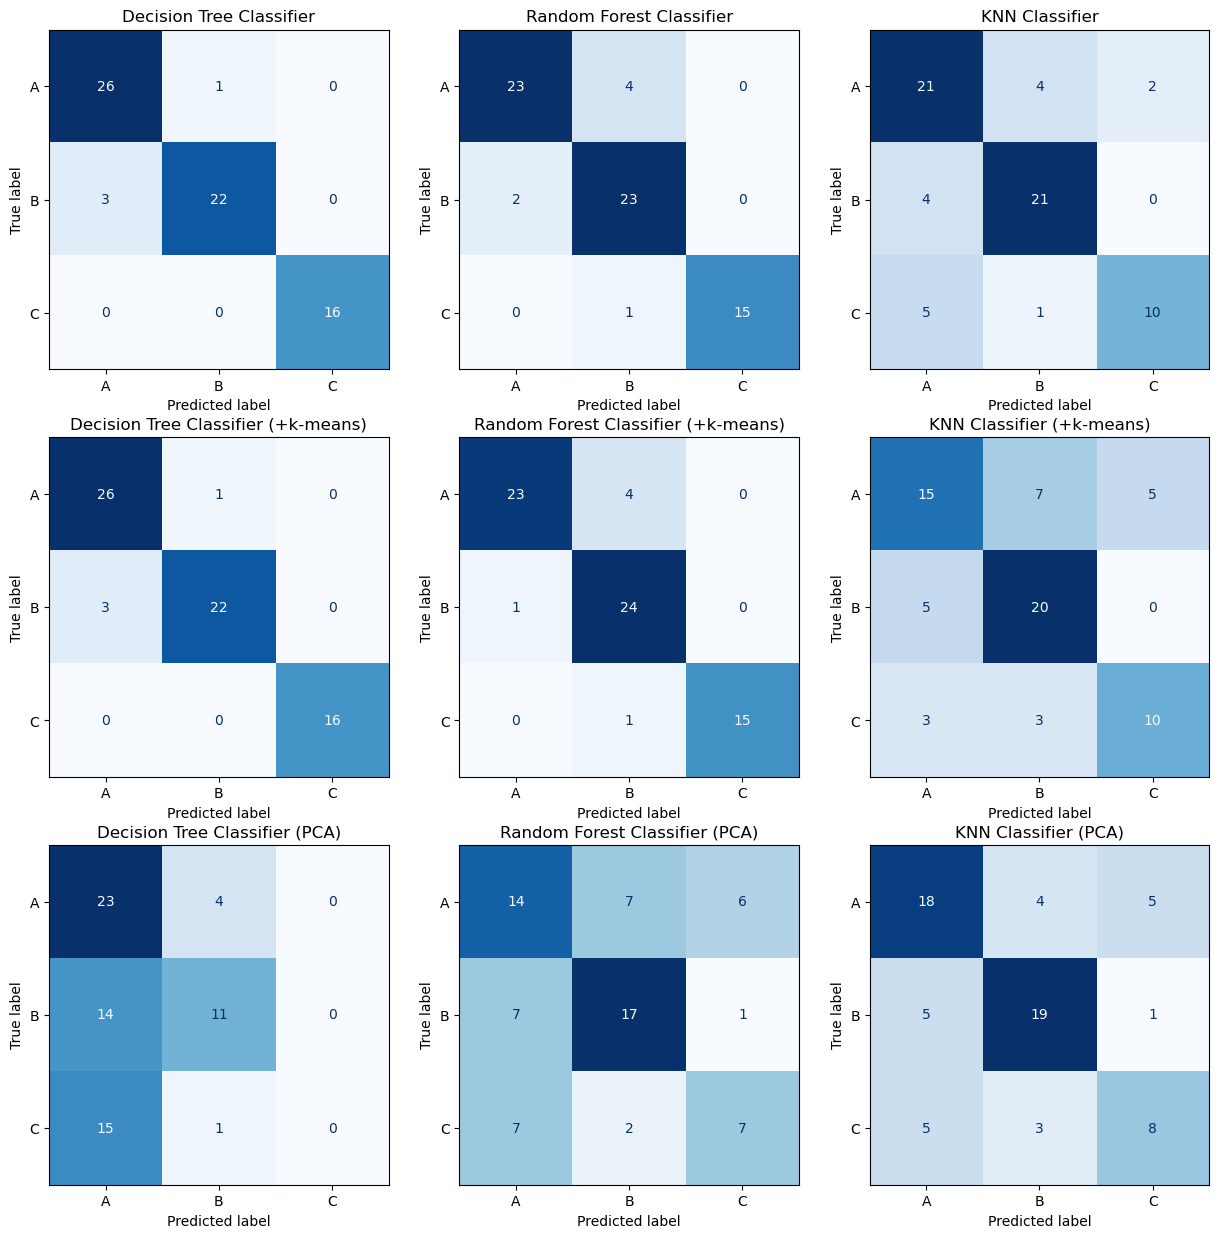

In [156]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Confusion Matrix 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=best_model_dtc.classes_)
disp1.plot(ax=axes[0,0], values_format='d', cmap='Blues', colorbar=False)
axes[0,0].set_title('Decision Tree Classifier')

# Confusion Matrix 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_model_rf.classes_)
disp2.plot(ax=axes[0,1], values_format='d', cmap='Blues', colorbar=False)
axes[0,1].set_title('Random Forest Classifier')

# Confusion Matrix 3
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=best_model_KNN.classes_)
disp3.plot(ax=axes[0,2], values_format='d', cmap='Blues', colorbar=False)
axes[0,2].set_title('KNN Classifier')

# Confusion Matrix 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_dtc_kmeans, display_labels=best_model_dtc.classes_)
disp1.plot(ax=axes[1,0], values_format='d', cmap='Blues', colorbar=False)
axes[1,0].set_title('Decision Tree Classifier (+k-means)')

# Confusion Matrix 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_kmeans, display_labels=best_model_rf.classes_)
disp2.plot(ax=axes[1,1], values_format='d', cmap='Blues', colorbar=False)
axes[1,1].set_title('Random Forest Classifier (+k-means)')

# Confusion Matrix 3
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_knn_kmeans, display_labels=best_model_KNN.classes_)
disp3.plot(ax=axes[1,2], values_format='d', cmap='Blues', colorbar=False)
axes[1,2].set_title('KNN Classifier (+k-means)')

# Confusion Matrix 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_dtc_pca, display_labels=best_model_dtc.classes_)
disp1.plot(ax=axes[2,0], values_format='d', cmap='Blues', colorbar=False)
axes[2,0].set_title('Decision Tree Classifier (PCA)')

# Confusion Matrix 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_pca, display_labels=best_model_rf.classes_)
disp2.plot(ax=axes[2,1], values_format='d', cmap='Blues', colorbar=False)
axes[2,1].set_title('Random Forest Classifier (PCA)')

# Confusion Matrix 3
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_knn_pca, display_labels=best_model_KNN.classes_)
disp3.plot(ax=axes[2,2], values_format='d', cmap='Blues', colorbar=False)
axes[2,2].set_title('KNN Classifier (PCA)')

plt.show

### Visualize classification accuracy of the nine classifiers

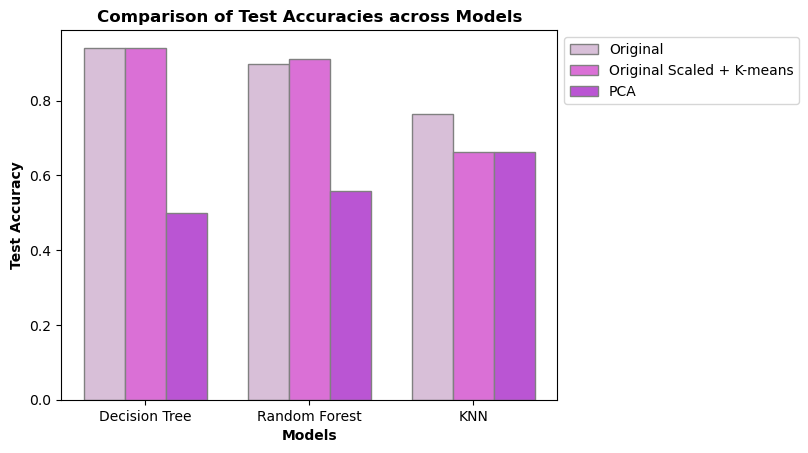

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)

# Example data (replace with your actual data)
categories = ['Decision Tree', 'Random Forest', 'KNN']
KNN_test_acc = best_model_KNN.score(X_test, y_test)
rf_test_acc = best_model_rf.score(X_test, y_test)
dtc_test_acc = best_model_dtc.score(X_test, y_test)

KNN_test_acc_kmeans = best_model_KNN_kmeans.score(X_test_cluster, y_test)
rf_test_acc_kmeans = best_model_rf_kmeans.score(X_test_cluster, y_test)
dtc_test_acc_kmeans = best_model_dtc_kmeans.score(X_test_cluster, y_test)

KNN_test_acc_pca = best_model_KNN_pca.score(X_test_pca, y_test)
rf_test_acc_pca = best_model_rf_pca.score(X_test_pca, y_test)
dtc_test_acc_pca = best_model_dtc_pca.score(X_test_pca, y_test)

original_ = [dtc_test_acc, rf_test_acc, KNN_test_acc]
kmeans_ = [dtc_test_acc_kmeans, rf_test_acc_kmeans, KNN_test_acc_kmeans]
pca_ = [dtc_test_acc_pca, rf_test_acc_pca, KNN_test_acc_pca]

# Bar width
bar_width = 0.25

# Set positions for bar groups
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots
plt.bar(r1, original_, color='thistle', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, kmeans_, color='orchid', width=bar_width, edgecolor='grey', label='Original Scaled + K-means')
plt.bar(r3, pca_, color='mediumorchid', width=bar_width, edgecolor='grey', label='PCA')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.ylabel('Test Accuracy', fontweight='bold')
plt.title('Comparison of Test Accuracies across Models', fontweight='bold')

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


### Visualize f1-weighted score of the nine classifiers

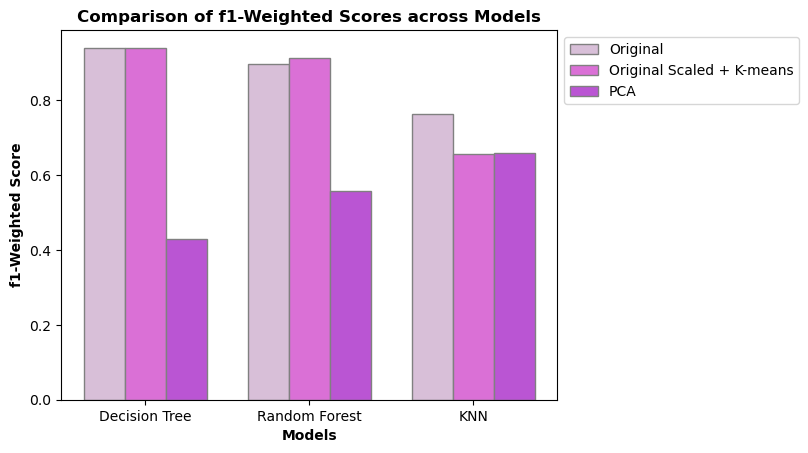

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)

# Example data (replace with your actual data)
categories = ['Decision Tree', 'Random Forest', 'KNN']
KNN_test_acc = best_model_KNN.score(X_test, y_test)
rf_test_acc = best_model_rf.score(X_test, y_test)
dtc_test_acc = best_model_dtc.score(X_test, y_test)

KNN_test_acc_kmeans = best_model_KNN_kmeans.score(X_test_cluster, y_test)
rf_test_acc_kmeans = best_model_rf_kmeans.score(X_test_cluster, y_test)
dtc_test_acc_kmeans = best_model_dtc_kmeans.score(X_test_cluster, y_test)

KNN_test_acc_pca = best_model_KNN_pca.score(X_test_pca, y_test)
rf_test_acc_pca = best_model_rf_pca.score(X_test_pca, y_test)
dtc_test_acc_pca = best_model_dtc_pca.score(X_test_pca, y_test)

original_ = [best_f1_dtc, best_f1_rf, best_f1_KNN]
kmeans_ = [best_f1_dtc_kmeans, best_f1_rf_kmeans, best_f1_KNN_kmeans]
pca_ = [best_f1_dtc_pca, best_f1_rf_pca, best_f1_KNN_pca]

# Bar width
bar_width = 0.25

# Set positions for bar groups
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots
plt.bar(r1, original_, color='thistle', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, kmeans_, color='orchid', width=bar_width, edgecolor='grey', label='Original Scaled + K-means')
plt.bar(r3, pca_, color='mediumorchid', width=bar_width, edgecolor='grey', label='PCA')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.ylabel('f1-Weighted Score', fontweight='bold')
plt.title('Comparison of f1-Weighted Scores across Models', fontweight='bold')

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


Decision tree is the best performing classifier. Out of all classifiers, decision tree has the highest accuracy and the highest f1 score of as seen in the barcharts above. Furthermore, training our models on the original data + k-means cluster classifications is in general better than using only the original dataset. However, models generally performed worst when only given PCA data.

## 4. Most Important Features

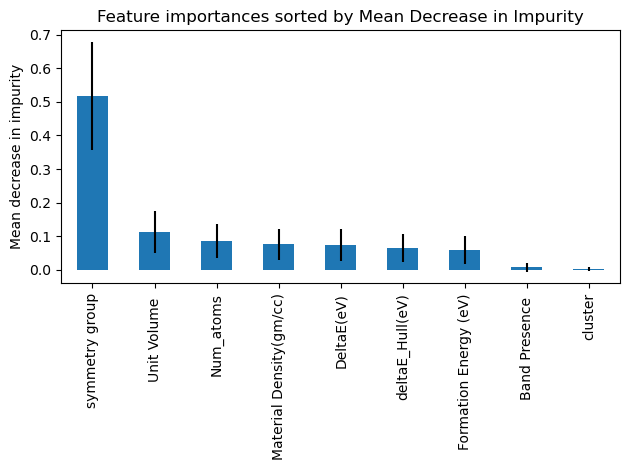

In [164]:
importance = best_model_rf_kmeans.feature_importances_

forest_importances = pd.Series(importance, index=X_train_cluster.columns)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

std_sorted = pd.Series(np.std([tree.feature_importances_ for tree in best_model_rf_kmeans.estimators_], axis=0),
                      index=X_train_cluster.columns).loc[forest_importances_sorted.index]

fig, ax = plt.subplots()
forest_importances_sorted.plot.bar(yerr=std_sorted, ax=ax)
ax.set_title("Feature importances sorted by Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Symmetry group is by far the most important feature in the random forest classifier. The other features contribute a much smaller decrease in impurity compared to symmetry group.

Re-organize features in dataframe from highest to lowest importance:

In [169]:
# create new dataframe with column order based on feature importance order
column_order = ['symmetry group', 'Unit Volume ', 'Num_atoms', 'Material Density(gm/cc)','DeltaE(eV)',
                'deltaE_Hull(eV)','Formation Energy (eV)', 'Band Presence ', 'cluster']  # Replace with your actual column order
X_train_cluster_reordered = X_train_cluster[column_order]
X_test_cluster_reordered = X_test_cluster[column_order]

In [170]:
X_test_cluster_reordered

,symmetry group,Unit Volume,Num_atoms,Material Density(gm/cc),DeltaE(eV),deltaE_Hull(eV),Formation Energy (eV),Band Presence,cluster
0,-0.350590,-0.592250,-0.613529,1.390762,-1.941500,-0.913335,-0.323883,0.516096,0
1,-0.784424,1.054639,1.153886,-0.263769,0.790109,0.192527,-0.284397,0.516096,1
2,-0.871191,-0.734764,-0.742852,-0.256336,0.801777,-1.535695,-0.535179,0.516096,0
3,-1.305026,-0.668895,-0.570421,1.837564,0.677757,0.435556,0.974590,0.516096,0
4,-1.565326,-1.017252,-1.001498,0.367531,0.316028,-1.046406,0.662798,0.516096,0
...,...,...,...,...,...,...,...,...,...
63,-0.350590,-0.469718,-0.570421,-0.792335,0.969610,-0.586346,-1.421937,0.516096,0
64,-1.652093,-0.206046,-0.139344,-0.238102,-0.672042,1.052552,-1.143629,0.516096,0
65,-0.350590,-0.118705,-0.268667,-0.556482,-1.891727,0.750904,-0.144381,0.516096,0
66,-0.350590,-0.112642,-0.053129,0.428888,-1.105398,-1.535232,-1.627479,0.516096,0


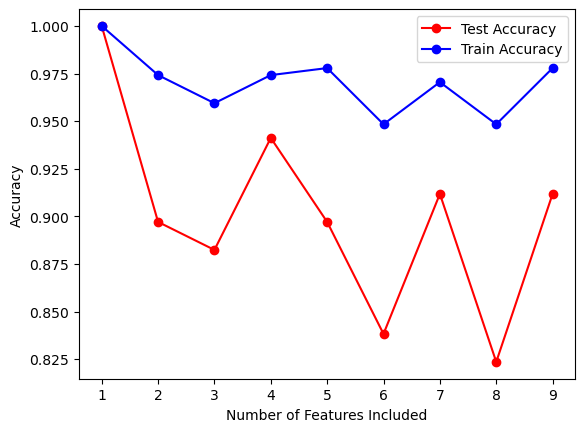

In [172]:
test_accuracy_num_features = []
train_accuracy_num_features = []
for i in range(1, len(X_train_cluster_reordered.columns)+1):
    # Create Random Forest Classifier
    rf_clf = RandomForestClassifier(random_state=randomState)
    # Define the hyperparameters and their possible values
    param_grid = {
        'max_depth': [1, 2, 3, 4, 5],
        'min_samples_split': [2, 3],
        'min_samples_leaf': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy', 'log_loss']
    }

    # Create GridSearchCV object
    grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', refit = True)
    grid_search.fit(X_train_cluster_reordered.iloc[:,:i], y_train)

    best_model_rf_kmeans = grid_search.best_estimator_
    train_accuracy_num_features.append(best_model_rf_kmeans.score(X_train_cluster_reordered.iloc[:,:i], y_train))
    test_accuracy_num_features.append(best_model_rf_kmeans.score(X_test_cluster_reordered.iloc[:,:i], y_test))

# Create a plot
plt.plot(range(1, len(test_accuracy_num_features) + 1), test_accuracy_num_features, marker='o', linestyle='-', color='red', label='Test Accuracy')
plt.plot(range(1, len(train_accuracy_num_features) + 1), train_accuracy_num_features, marker='o', linestyle='-', color='blue', label='Train Accuracy')

# Set labels for the axes
plt.xlabel('Number of Features Included')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()

From the accuracy plot above, it is clear to see the random forest performs best when trained on only the single most important feature. Using only the 'symmetry group' feature, the model classifies 100% of the training and testing data correctly. The model performs worsens when we include more features in the training set.

## 5. XGBoost

### Implement XGBoost Classifier with hyperparameter tuning

In [ ]:
# Define a mapping dictionary
label_mapping = {'A': 0, 'B': 1, 'C': 2}

# Use the map function to replace string labels with numerical labels
y_encoded_train = list(map(lambda x: label_mapping[x], y_train))
y_encoded_test = list(map(lambda x: label_mapping[x], y_test))


param_grid = {
 'reg_alpha':[0, 0.01], # L1 regularization term on weight used for high dimensional data
 'min_child_weight':[0, 0.5], # minimum sum of weights of observations required in a child
 'max_depth': [2, 3], # maximum depth of a tree
 'gamma': [0.025, 0.05], # minimum loss reduction required to make a split
 'subsample': [0.5, 0.8, 1], # fraction of observations to be random samples for each tree
 'colsample_bytree': [0.5, 0.8, 1], # fraction of columns to be random samples for each tree
 'n_estimators': [50,100,150] # number of trees
}

grid_search = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, objective= 'multi:softmax',num_class = 3, seed=randomState),
 param_grid = param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_encoded_train)

best_model_XGB = grid_search.best_estimator_
best_parameters_XGB = grid_search.best_params_
best_f1_XGB = f1_score(y_encoded_test, best_model_XGB.predict(X_test), average='weighted')
print('Results for highest accuracy model:')
print('Model parameters:', best_parameters_XGB)
print('f1-weighted score:', best_f1_XGB)
print("Accuracy on training set: {:.5f}".format(best_model_XGB.score(X_train, y_encoded_train)))
print("Accuracy on test set: {:.5f}".format(best_model_XGB.score(X_test, y_encoded_test)))

Results for highest accuracy model:
Model parameters: {'colsample_bytree': 0.8, 'gamma': 0.025, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 0, 'subsample': 1}
f1-weighted score: 1.0
Accuracy on training set: 1.00000
Accuracy on test set: 1.00000


From the above results, we see XGBoost classified 100% of the training and testing data correctly. The performance of XGBoost is superior to the models trained in Parts 2 and 3.

## 6. Neural Nets

**Cool things you can try doing if you want that won't be graded** <br>
1. Remove outliers to see if that improves the classification
2. Try out data visualization techniques that were not covered in the course
3. See if you implement transfer learning and hyperparameter tuning for your neural network model

Split dataset into train (70% of data), validation (15% of data), and test set (15% of data):

In [206]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaled, y_pred, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape,X_val.shape, X_test.shape,Y_train.shape,Y_val.shape, Y_test.shape)

(237, 8) (51, 8) (51, 8) (237,) (51,) (51,)


Defining a sequential neural network model architecture with 10 layers:

In [207]:
tf.random.set_seed(42)
model10 = tf.keras.Sequential()
model10.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model10.add(tf.keras.layers.Dense(1000, activation="relu"))
model10.add(tf.keras.layers.Dense(500, activation="relu"))
model10.add(tf.keras.layers.Dense(250, activation="relu"))
model10.add(tf.keras.layers.Dense(125, activation="relu"))
model10.add(tf.keras.layers.Dense(60, activation="relu"))
model10.add(tf.keras.layers.Dense(30, activation="relu"))
model10.add(tf.keras.layers.Dense(15, activation="relu"))
model10.add(tf.keras.layers.Dense(10, activation="relu"))
model10.add(tf.keras.layers.Dense(8, activation="relu"))
model10.add(tf.keras.layers.Dense(3, activation="softmax"))
model10.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 1000)              9000      
                                                                 
 dense_62 (Dense)            (None, 500)               500500    
                                                                 
 dense_63 (Dense)            (None, 250)               125250    
                                                                 
 dense_64 (Dense)            (None, 125)               31375     
                                                                 
 dense_65 (Dense)            (None, 60)                7560      
                                                                 
 dense_66 (Dense)            (None, 30)                1830      
                                                                 
 dense_67 (Dense)            (None, 15)              

Defining a sequential neural network model architecture with 5 layers:

In [208]:
tf.random.set_seed(42)
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model5.add(tf.keras.layers.Dense(600, activation="relu"))
model5.add(tf.keras.layers.Dense(300, activation="relu"))
model5.add(tf.keras.layers.Dense(150, activation="relu"))
model5.add(tf.keras.layers.Dense(20, activation="relu"))
model5.add(tf.keras.layers.Dense(3, activation="softmax"))
model5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 600)               5400      
                                                                 
 dense_72 (Dense)            (None, 300)               180300    
                                                                 
 dense_73 (Dense)            (None, 150)               45150     
                                                                 
 dense_74 (Dense)            (None, 20)                3020      
                                                                 
 dense_75 (Dense)            (None, 3)                 63        
                                                                 
Total params: 233933 (913.80 KB)
Trainable params: 233933 (913.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Defining a sequential neural network model architecture with 3 layers:

In [209]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model3.add(tf.keras.layers.Dense(150, activation="relu"))
model3.add(tf.keras.layers.Dense(20, activation="relu"))
model3.add(tf.keras.layers.Dense(3, activation="softmax"))
model3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 150)               1350      
                                                                 
 dense_77 (Dense)            (None, 20)                3020      
                                                                 
 dense_78 (Dense)            (None, 3)                 63        
                                                                 
Total params: 4433 (17.32 KB)
Trainable params: 4433 (17.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile models:

In [210]:
model10.compile(loss="sparse_categorical_crossentropy", #because it digits / use cross entropy in other classification
              optimizer="adam", #stochastic gradients  descent or adams most comm
              metrics=["accuracy"])

model5.compile(loss="sparse_categorical_crossentropy", #because it digits / use cross entropy in other classification
              optimizer="adam", #stochastic gradients  descent or adams most comm
              metrics=["accuracy"])

model3.compile(loss="sparse_categorical_crossentropy", #because it digits / use cross entropy in other classification
              optimizer="adam", #stochastic gradients  descent or adams most comm
              metrics=["accuracy"])

In [211]:
# Create a ModelCheckpoint callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("features_model", save_best_only=True)

In [212]:
#early stopping, patience = 10
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

Train all three neural networks with 20 epochs:

In [213]:
model10.fit(X_train, Y_train, epochs=20, validation_data=(X_val,Y_val),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/20
1/8 [==>...........................] - ETA: 9s - loss: 1.0999 - accuracy: 0.3438INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 3s 192ms/step - loss: 1.0275 - accuracy: 0.5148 - val_loss: 0.8265 - val_accuracy: 0.5686
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6405 - accuracy: 0.6624INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 169ms/step - loss: 0.6405 - accuracy: 0.6624 - val_loss: 0.4855 - val_accuracy: 0.9804
Epoch 3/20
1/8 [==>...........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.9375INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 169ms/step - loss: 0.4130 - accuracy: 0.9283 - val_loss: 0.2990 - val_accuracy: 0.9804
Epoch 4/20
1/8 [==>...........................] - ETA: 0s - loss: 0.2339 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 2s 216ms/step - loss: 0.2492 - accuracy: 0.9451 - val_loss: 0.0809 - val_accuracy: 0.9804
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0998 - accuracy: 0.9705 - val_loss: 0.1515 - val_accuracy: 0.9216
Epoch 6/20
1/8 [==>...........................] - ETA: 0s - loss: 0.0177 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 166ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9804
Epoch 8/20
1/8 [==>...........................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 164ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 6.5906e-04 - val_accuracy: 1.0000
Epoch 9/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0315 - accuracy: 0.9831 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 10/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0372 - accuracy: 0.9916 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 11/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 12/20
1/8 [==>...........................] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 166ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.5927e-04 - val_accuracy: 1.0000
Epoch 13/20
1/8 [==>...........................] - ETA: 0s - loss: 5.3156e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 172ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.7918e-04 - val_accuracy: 1.0000
Epoch 14/20
8/8 [==============================] - 0s 11ms/step - loss: 6.3726e-04 - accuracy: 1.0000 - val_loss: 4.5726e-04 - val_accuracy: 1.0000
Epoch 15/20
8/8 [==============================] - 0s 10ms/step - loss: 6.7622e-04 - accuracy: 1.0000 - val_loss: 5.3476e-04 - val_accuracy: 1.0000
Epoch 16/20
8/8 [==============================] - 0s 10ms/step - loss: 5.8195e-04 - accuracy: 1.0000 - val_loss: 4.2917e-04 - val_accuracy: 1.0000
Epoch 17/20
1/8 [==>...........................] - ETA: 0s - loss: 7.0698e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 168ms/step - loss: 4.7342e-04 - accuracy: 1.0000 - val_loss: 3.3551e-04 - val_accuracy: 1.0000
Epoch 18/20
1/8 [==>...........................] - ETA: 0s - loss: 3.3706e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 171ms/step - loss: 3.9857e-04 - accuracy: 1.0000 - val_loss: 2.8881e-04 - val_accuracy: 1.0000
Epoch 19/20
1/8 [==>...........................] - ETA: 0s - loss: 2.1344e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 165ms/step - loss: 3.5243e-04 - accuracy: 1.0000 - val_loss: 2.6455e-04 - val_accuracy: 1.0000
Epoch 20/20
1/8 [==>...........................] - ETA: 0s - loss: 2.4538e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: features_model\assets


INFO:tensorflow:Assets written to: features_model\assets


8/8 [==============================] - 1s 166ms/step - loss: 3.1616e-04 - accuracy: 1.0000 - val_loss: 2.4741e-04 - val_accuracy: 1.0000


In [214]:
model5.fit(X_train, Y_train, epochs=20, validation_data=(X_val,Y_val),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/20


8/8 [==============================] - 1s 31ms/step - loss: 0.8724 - accuracy: 0.7046 - val_loss: 0.4813 - val_accuracy: 0.9804
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 0.3121 - accuracy: 0.9536 - val_loss: 0.1032 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0917 - accuracy: 0.9831 - val_loss: 0.0629 - val_accuracy: 0.9804
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0699 - accuracy: 0.9705 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0733 - val_accuracy: 0.9412
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9916 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 8/20
8/8 [============================

In [215]:
model3.fit(X_train, Y_train, epochs=20, validation_data=(X_val,Y_val),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/20


8/8 [==============================] - 1s 24ms/step - loss: 0.9680 - accuracy: 0.6582 - val_loss: 0.8677 - val_accuracy: 0.8824
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.7876 - accuracy: 0.9241 - val_loss: 0.6837 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6276 - accuracy: 0.9662 - val_loss: 0.5321 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.9747 - val_loss: 0.4096 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3908 - accuracy: 0.9747 - val_loss: 0.3182 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3090 - accuracy: 0.9789 - val_loss: 0.2485 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.2478 - accuracy: 0.9789 - val_loss: 0.1988 - val_accuracy: 1.0000
Epoch 8/20
8/8 [============================

Evaluate the test accuracies of the three neural network models:

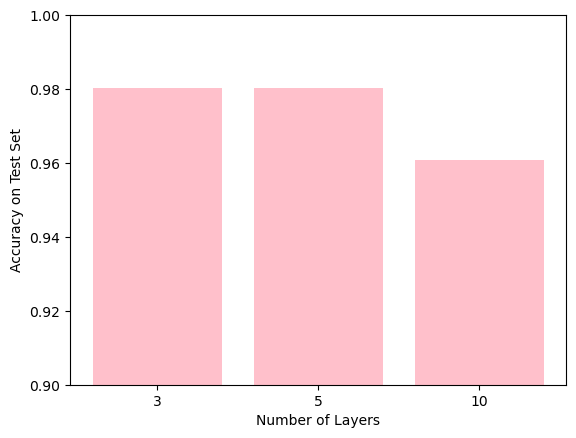

In [225]:
test_acc10 = model10.evaluate(X_test, Y_test)[1]
test_acc5 = model5.evaluate(X_test, Y_test)[1]
test_acc3 = model3.evaluate(X_test, Y_test)[1]

x_values = ['3', '5', '10']
y_values = [test_acc3, test_acc5, test_acc10]

# Bar chart
plt.bar(x_values, y_values, color=['pink'])
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy on Test Set')
plt.ylim(0.9, 1)  # Set y-axis limit to ensure proper visualization of accuracy values
plt.show()

From the above plot, we see all the sequential neural networks have an accuracy above 0.96 on the test set. We also observe the deepest neural net with 10 layers had a lower test accuracy of around 96% comparted to the shallower neural networks with 3 or 5 layers that had a test accuracy of around 98%. In this case, the neural networks did not outperform traditional machine learning models like XGBoost and Random Forest. The reason is likely we do not have a large enough training dataset.